## Random Forest Model

In [23]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score

## Load Data

In [24]:
df = pd.read_csv('./data/reddit_df.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [25]:
X = df['title']
y = df['real']

In [26]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

## Baseline Accuracy

In [27]:
y.value_counts(normalize=True)

1    0.508027
0    0.491973
Name: real, dtype: float64

## Random Forest

In [33]:
pipe = Pipeline([
    ('cvec',CountVectorizer()),
    ('rf',RandomForestClassifier())
])
pipe_params = {
    'cvec__max_features':[2_000, 3_000],
    'cvec__min_df'      :[2],
    'cvec__max_df'      :[.9],
    'cvec__ngram_range' :[(1,1)],
    'rf__n_estimators':[200,300,400],
    'rf__max_depth':[3,4]
}
gs_rf = GridSearchCV(pipe,param_grid = pipe_params, cv=5)

In [34]:
gs_rf.fit(X_train,y_train);

In [35]:
print('Train score', cross_val_score(pipe,X_train,y_train,cv=10).mean())
print('Test score', gs_rf.score(X_test,y_test))
y_pred = gs_rf.predict(X_test)
print('f1 score',f1_score(y_test,y_pred))

Train score 0.8043593994657826
Test score 0.7795566502463054
f1 score 0.7713920817369093


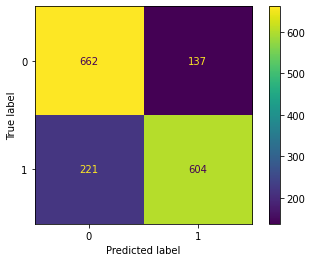

In [36]:
plot_confusion_matrix(gs_rf,X_test,y_test)

In [37]:
gs_rf.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'rf__max_depth': 4,
 'rf__n_estimators': 400}

## Important Features

In [44]:
pipe = Pipeline([
    ('cvec',CountVectorizer(max_df=0.9,max_features=2000,min_df=2,ngram_range=(1,1))),
    ('rf',RandomForestClassifier(max_depth=4,n_estimators=400))
])
pipe.fit(X_train,y_train);

In [48]:
# Retrieve the coefficients, turn into dataframe, and show the largest coefficient
coef = pipe.named_steps['rf'].feature_importances_
coef_df = pd.DataFrame({'coefs':coef},index=pipe.named_steps['cvec'].get_feature_names())
coef_df.nlargest(10,'coefs')

,coefs
police,0.061115
arrested,0.042659
us,0.033151
onion,0.029810
shooting,0.029678
officer,0.028195
nation,0.026678
charged,0.024804
killed,0.022798
shot,0.018668


This Random Forest model perform slightly worse than the Naive Bayes model, But there important features are similar.